# 😺 Object Detection And Generate Audio Based On Detection

### 🙀 Image to Audio Generation

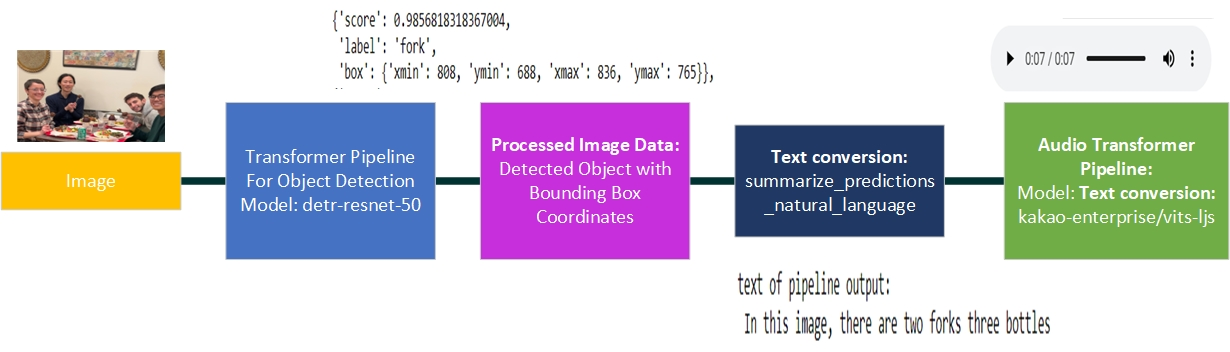

### 👽 Import Libraries


In [1]:
#!pip install transformers
#!pip install gradio
#!pip install timm
#!pip install inflect
#!pip install phonemizer

- **!pip install transformers:** Installs the Transformers library, which provides state-of-the-art natural language processing models for various tasks such as text classification, translation, summarization, and question answering.

- **!pip install gradio:** Installs Gradio, a Python library that simplifies the creation of interactive web-based user interfaces for machine learning models, allowing users to interact with models via a web browser.

- **!pip install timm:** Installs Timm, a PyTorch library that offers a collection of pre-trained models and a simple interface to use them, primarily focused on computer vision tasks such as image classification and object detection.

- **!pip install inflect:** Installs Inflect, a Python library used for converting numbers to words, pluralizing and singularizing nouns, and generating ordinals and cardinals.

- **!pip install phonemizer:** Installs Phonemizer, a Python library for converting text into phonetic transcriptions, useful for tasks such as text-to-speech synthesis and linguistic analysis.

- To run locally in a Linux machine, follow these commands:

```sh
  sudo apt-get update
```
```sh
  sudo apt-get install espeak-ng
```
```sh
  pip install py-espeak-ng
```


**📕 APT stands for Advanced Package Tool**. It is a package management system used by various Linux distributions, including Debian and Ubuntu. APT allows users to install, update, and remove software packages on their system from repositories. It also resolves dependencies automatically, ensuring that all required dependencies for a package are installed.


- sudo apt-get update: Updates the package index of APT.
- sudo apt-get install espeak-ng: Installs the espeak-ng text-to-speech synthesizer.
- pip install py-espeak-ng: Installs the Python interface for espeak-ng.

In [1]:
# to avoid warnings

from transformers.utils import logging

logging.set_verbosity_error()

### 👻 Load Image


In [2]:
from helper import load_image_from_url, render_results_in_image

### Build the object-detection pipeline using 🤗 Transformers Library

In [3]:
from transformers import pipeline

#object detection

od_pipe = pipeline(task = "object-detection", model = "./models/facebook/detr-resnet-50")

print(f"object detection pipeline is: {od_pipe} in memory address.")

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

object detection pipeline is: <transformers.pipelines.object_detection.ObjectDetectionPipeline object at 0x7f28c28ffdc0> in memory address.


# 🔍 What is Object Detection


📷 Object detection is a computer vision task that involves identifying and locating objects within an image or video. The goal is to not only recognize what objects are present but also to precisely locate them by drawing bounding boxes around them. 

It's crucial for automating tasks like surveillance, autonomous driving, and quality control, enhancing safety, efficiency, and user experiences across various industries.

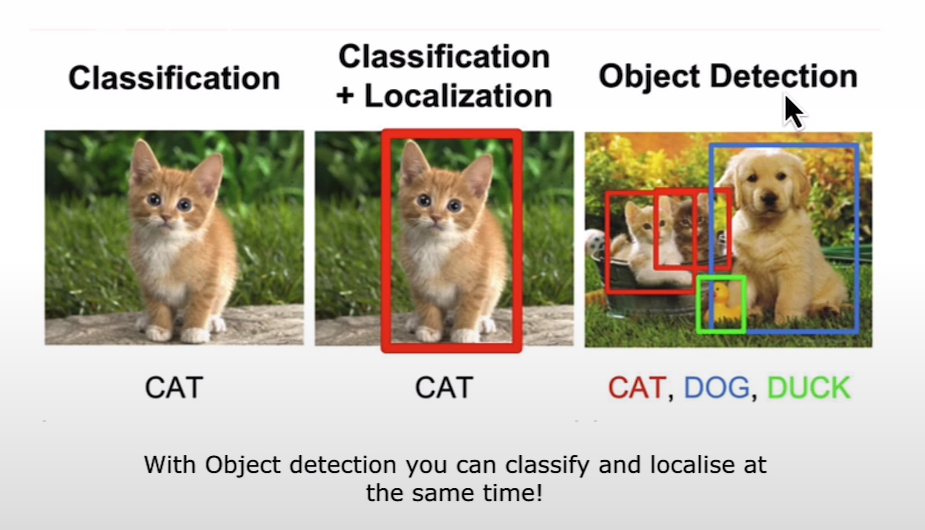

### 🔔 To Find Out the State of Art Models for Object Detection in Hagging Face

👉 Haggig Face Models: https://huggingface.co/models?sort=trending

👉 Haggig Face SoTA Models for Object Detection: https://huggingface.co/models?pipeline_tag=object-detection&sort=trending

👉 Model: https://huggingface.co/facebook/detr-resnet-50

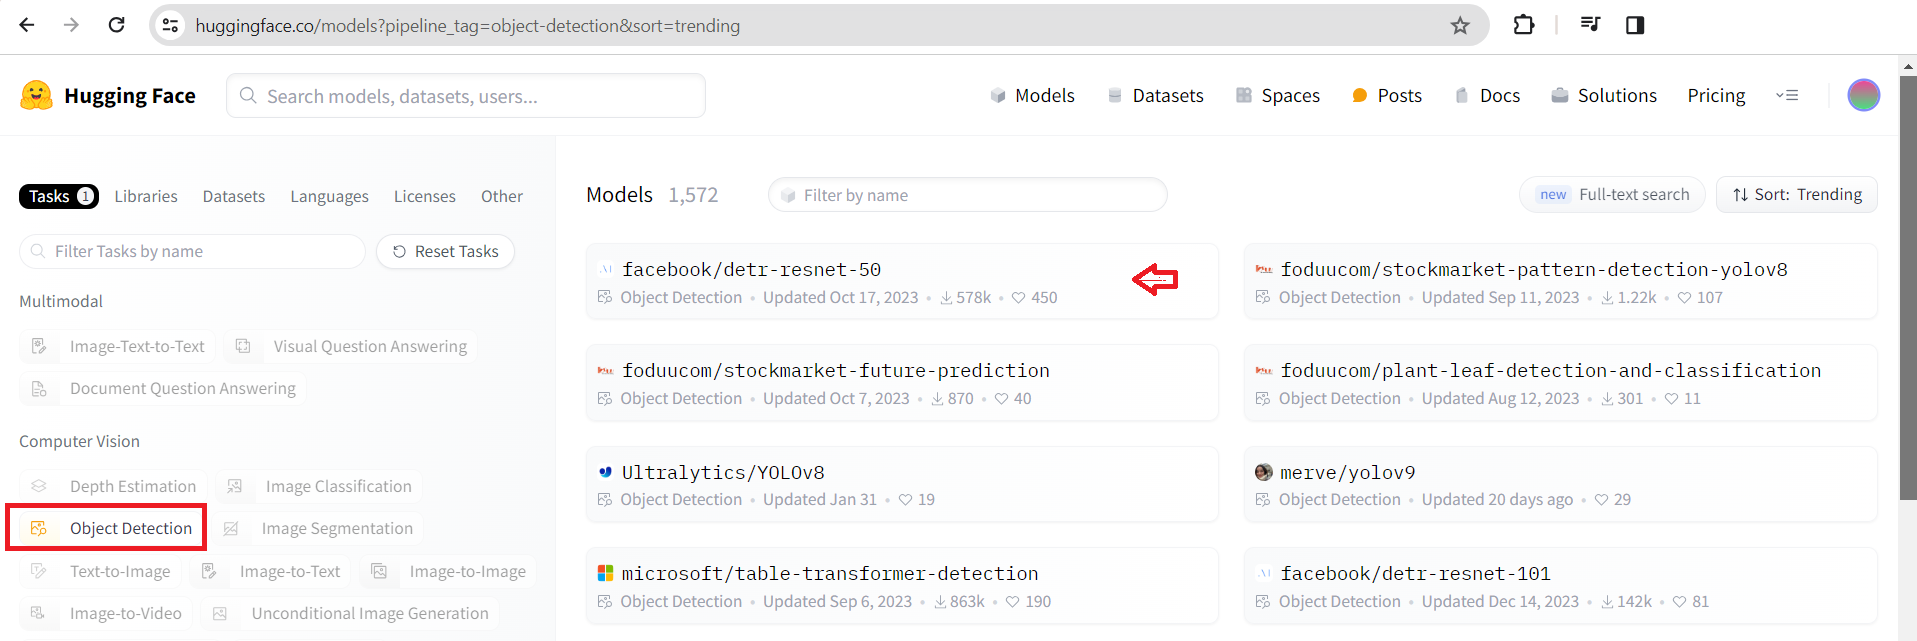

### 🎊 facebook/detr-resnet-50

**DETR (End-to-End Object Detection) model with ResNet-50 backbone:**

DETR (DEtection TRansformer) model, trained on COCO 2017 dataset, is an end-to-end object detection model with ResNet-50 backbone. Utilizing encoder-decoder transformer architecture, it employs object queries for detection and bipartite matching loss for optimization, achieving accurate object localization and classification.

**📦 COCO Dataset:**

The COCO (Common Objects in Context) 2017 dataset 📷 is a widely used benchmark dataset for object detection, segmentation, and captioning tasks in computer vision. It consists of a large collection of images with complex scenes containing multiple objects in various contexts. The dataset is annotated with bounding boxes, segmentation masks, and captions for each object instance, providing rich and diverse training data for developing and evaluating object detection algorithms.

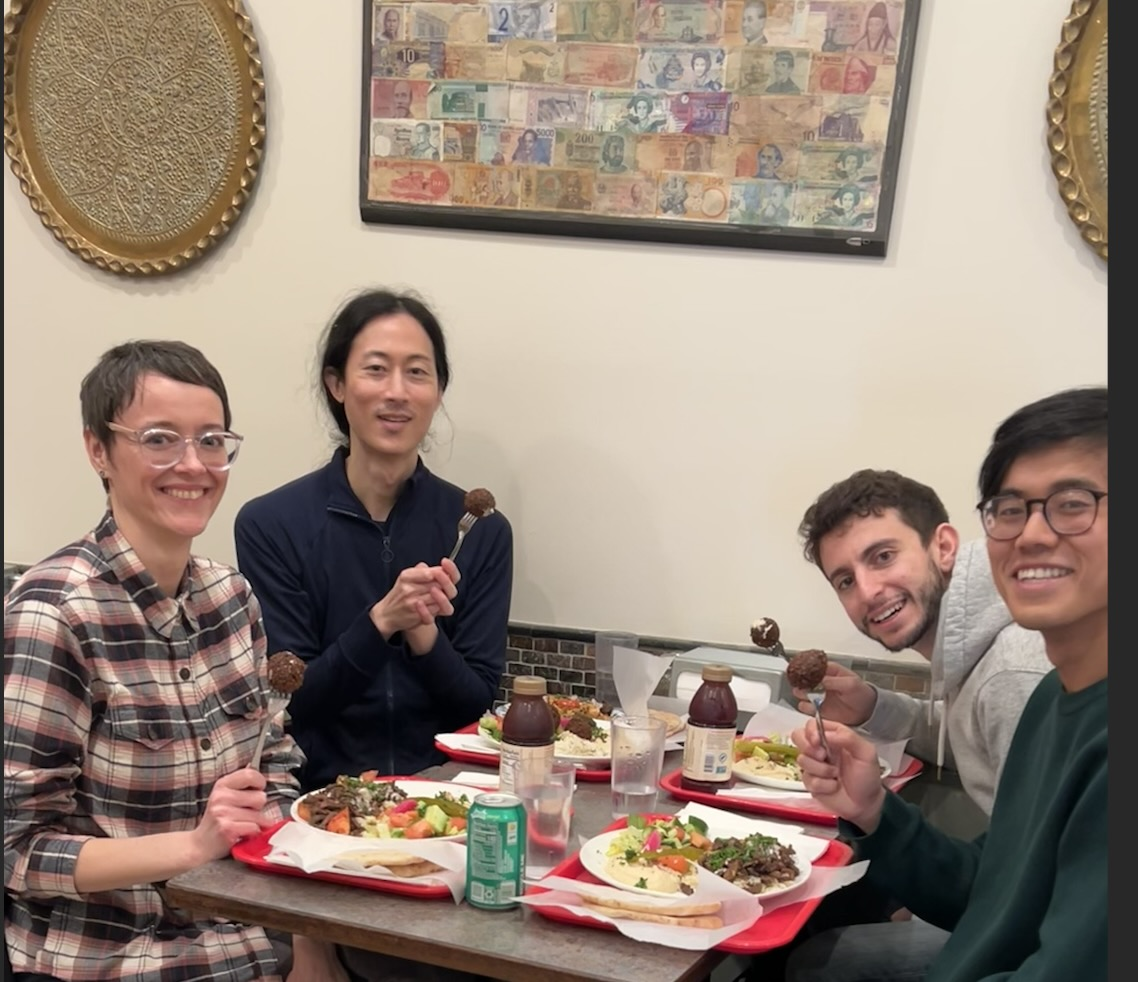

In [4]:
from PIL import Image
raw_image = Image.open("huggingface_friends.jpg")
raw_image

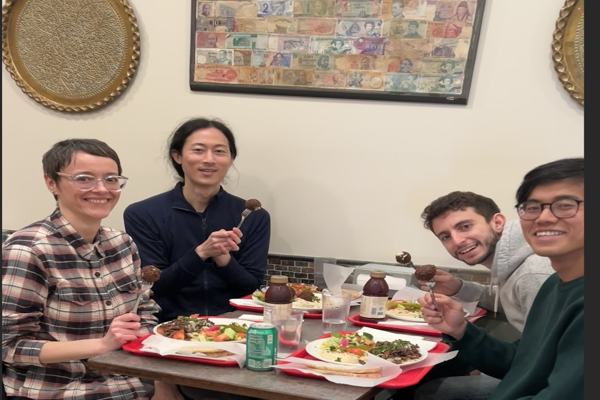

In [5]:
#resize image

raw_image.resize((600, 400))

In [7]:
pipeline_output = od_pipe(raw_image)

print(f"details of output pipeline for object detection: \n{pipeline_output}")

details of output pipeline for object detection: 
[{'score': 0.9856818318367004, 'label': 'fork', 'box': {'xmin': 808, 'ymin': 688, 'xmax': 836, 'ymax': 765}}, {'score': 0.9904232025146484, 'label': 'bottle', 'box': {'xmin': 688, 'ymin': 667, 'xmax': 743, 'ymax': 789}}, {'score': 0.9948464632034302, 'label': 'cup', 'box': {'xmin': 520, 'ymin': 770, 'xmax': 577, 'ymax': 863}}, {'score': 0.9971936941146851, 'label': 'person', 'box': {'xmin': 778, 'ymin': 387, 'xmax': 1125, 'ymax': 972}}, {'score': 0.9695368409156799, 'label': 'bottle', 'box': {'xmin': 465, 'ymin': 786, 'xmax': 527, 'ymax': 912}}, {'score': 0.9300820231437683, 'label': 'bowl', 'box': {'xmin': 556, 'ymin': 739, 'xmax': 622, 'ymax': 779}}, {'score': 0.9995697140693665, 'label': 'person', 'box': {'xmin': 231, 'ymin': 286, 'xmax': 510, 'ymax': 783}}, {'score': 0.99920254945755, 'label': 'person', 'box': {'xmin': 0, 'ymin': 338, 'xmax': 349, 'ymax': 974}}, {'score': 0.9742276072502136, 'label': 'dining table', 'box': {'xmin': 

Object Detection with Confidence Score:


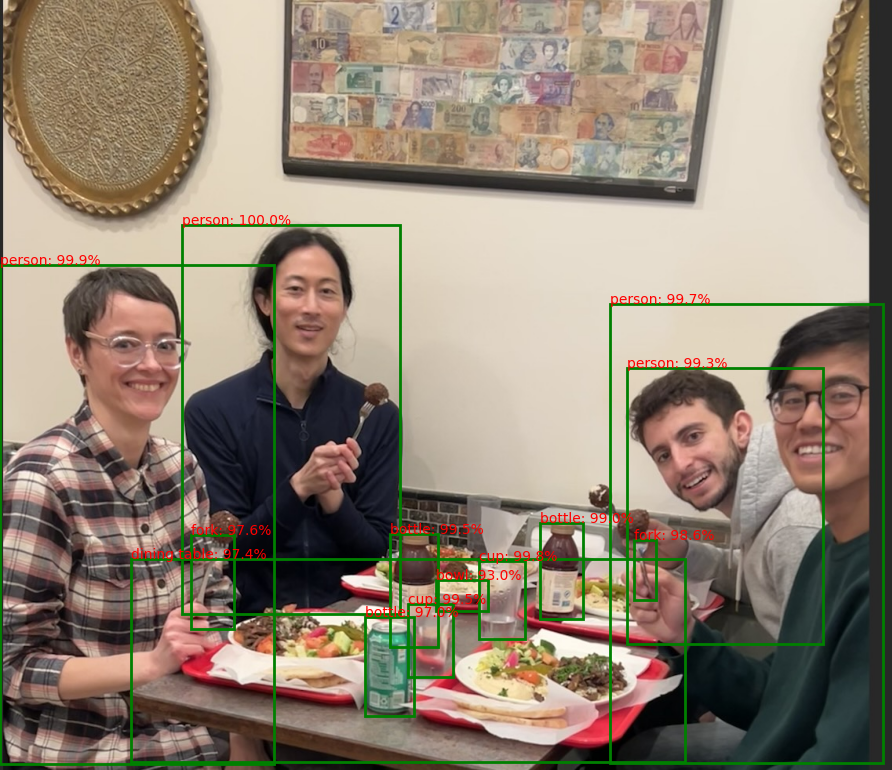

In [9]:
propossed_image = render_results_in_image(raw_image, pipeline_output)
print("Object Detection with Confidence Score:")
propossed_image

# 📺 Make Gradio Apps for Object Detection

**✨ Gradio:***

🛠️🚀 Build & Share Delightful Machine Learning Apps

Gradio offers the fastest way to showcase your machine learning model, providing a user-friendly web interface that enables anyone to utilize it from any location!

**👉 Gradio Website:** https://www.gradio.app/

**👉 Gradio In Hugging Face:** https://huggingface.co/gradio

**👉 Gradio Github:** https://github.com/gradio-app/gradio

In [11]:
import os
import gradio as gr

In [12]:
def get_pipeline_prediction(pil_image):
    
    pipeline_output = od_pipe(pil_image)
    processed_image = render_results_in_image(pil_image, pipeline_output)
    
    return processed_image
    

In [14]:
demo = gr.Interface(
fn = get_pipeline_prediction,
inputs = gr.Image(label = "Input Image", type = "pil"),
outputs = gr.Image(label = "Output Image with Predicted Instance", type = "pil"))


In [15]:
print(f"demo: {demo}")

demo: Gradio Interface for: get_pipeline_prediction
---------------------------------------------
inputs:
|-image
outputs:
|-image


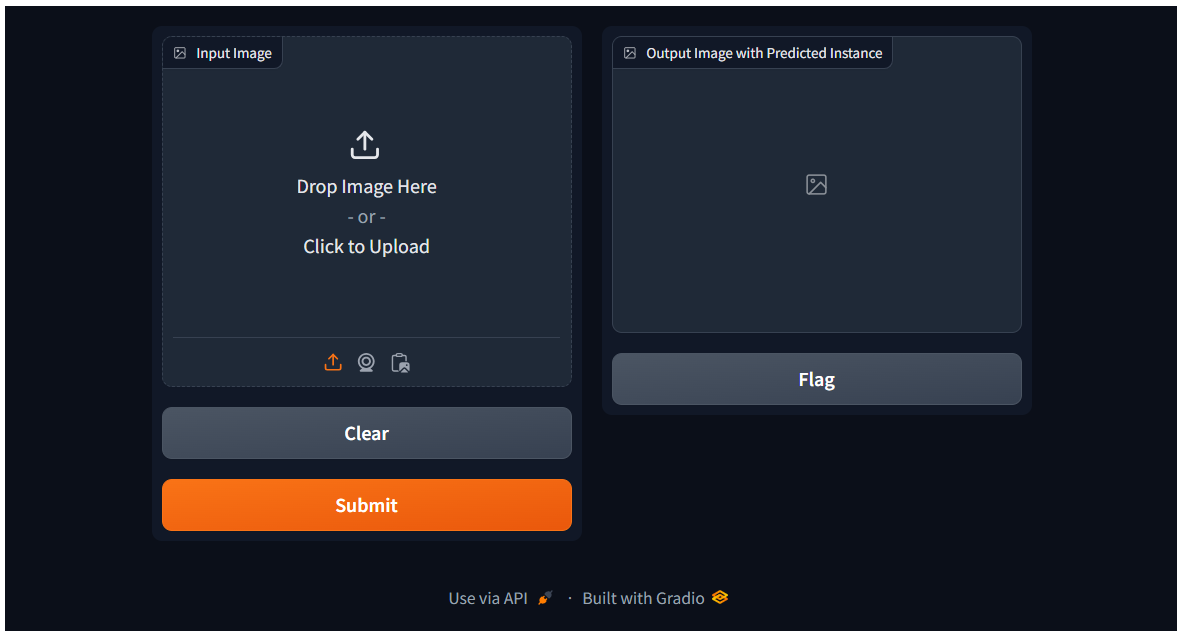

In [16]:
#launch the app
demo.launch(share = True)

#demo.launch(share=True, server_port=int(os.environ['PORT1']))

Running on local URL:  https://0.0.0.0:7860
Running on public URL: https://08c99905470df07156.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [17]:
demo.close()

Closing server running on port: 7860


**🚦 note:** The app will continue running unless you run **demo.close()**

# ✨ Make An AI powered Audio Assistant

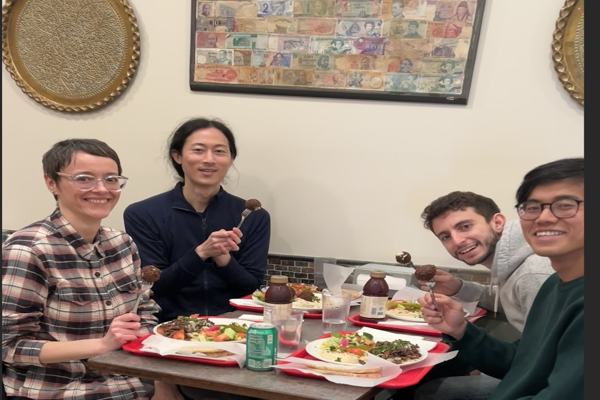

In [20]:
#resize image

raw_image.resize((600, 400))

In [19]:
pipeline_output

[{'score': 0.9856818318367004,
  'label': 'fork',
  'box': {'xmin': 808, 'ymin': 688, 'xmax': 836, 'ymax': 765}},
 {'score': 0.9904232025146484,
  'label': 'bottle',
  'box': {'xmin': 688, 'ymin': 667, 'xmax': 743, 'ymax': 789}},
 {'score': 0.9948464632034302,
  'label': 'cup',
  'box': {'xmin': 520, 'ymin': 770, 'xmax': 577, 'ymax': 863}},
 {'score': 0.9971936941146851,
  'label': 'person',
  'box': {'xmin': 778, 'ymin': 387, 'xmax': 1125, 'ymax': 972}},
 {'score': 0.9695368409156799,
  'label': 'bottle',
  'box': {'xmin': 465, 'ymin': 786, 'xmax': 527, 'ymax': 912}},
 {'score': 0.9300820231437683,
  'label': 'bowl',
  'box': {'xmin': 556, 'ymin': 739, 'xmax': 622, 'ymax': 779}},
 {'score': 0.9995697140693665,
  'label': 'person',
  'box': {'xmin': 231, 'ymin': 286, 'xmax': 510, 'ymax': 783}},
 {'score': 0.99920254945755,
  'label': 'person',
  'box': {'xmin': 0, 'ymin': 338, 'xmax': 349, 'ymax': 974}},
 {'score': 0.9742276072502136,
  'label': 'dining table',
  'box': {'xmin': 167, '

In [22]:
#pipeline details

print(f"pipeline for object detetion model: {od_pipe} in memory address")

pipeline for object detetion model: <transformers.pipelines.object_detection.ObjectDetectionPipeline object at 0x7f28c28ffdc0> in memory address


# 🎑 Text Genaration From Pipeline Output

In [21]:
#helper function
from helper import summarize_predictions_natural_language

In [23]:
text = summarize_predictions_natural_language(pipeline_output)

print(f"text of pipeline output: \n {text}")

text of pipeline output: 
 In this image, there are two forks three bottles two cups four persons one bowl and one dining table.


# 🎆 Generate Audio Narration Of An Image

- convert text to speech for audio narration

- using **`kakao-enterprise/vits-ljs`**, generate text to audio

**🔍 kakao-enterprise/vits-ljs:**

🔊📚 VITS: Conditional Variational Autoencoder with Adversarial Learning for End-to-End Text-to-Speech

👉 model: https://huggingface.co/kakao-enterprise/vits-ljs

- Overview:

VITS is an end-to-end model for speech synthesis, utilizing a conditional variational autoencoder (VAE) architecture. It predicts speech waveforms based on input text sequences, incorporating a flow-based module and a stochastic duration predictor to handle variations in speech rhythm.

### Build the text-speech pipeline using 🤗 Transformers Library

In [24]:
tts_pipe = pipeline("text-to-speech",
                    model="./models/kakao-enterprise/vits-ljs")

In [25]:
print(f"text-speech pipeline is: {tts_pipe} in memory address")

text-speech pipeline is: <transformers.pipelines.text_to_audio.TextToAudioPipeline object at 0x7f28c41d47c0> in memory address


In [28]:
narrated_text = tts_pipe(text)
print(f"amplitude of digital wave with sample rate:\n {narrated_text}")

amplitude of digital wave with sample rate:
 {'audio': array([[-0.0001944 , -0.00024611, -0.000566  , ...,  0.00070611,
         0.00106553,  0.00107409]], dtype=float32), 'sampling_rate': 22050}


### 🎄 Play the Generated Audio

In [30]:
from IPython.display import Audio as IPythonAudio

In [31]:
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])